## Ballistic deposition

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# 1D Ballistic deposition simulation

# Parameters
N = 500000 # number of particles
L = 200 # size of the grid
n_interfaces = 500

# Initialize the grid
interfaces = np.zeros((n_interfaces,L))
h = np.zeros(N//1000)
w = np.zeros(N//1000)
h_fft = np.zeros((N//1000,L//2+1))
h_mean = np.zeros(N//1000)
w_mean = np.zeros(N//1000)
h_fft_mean = np.zeros((N//1000,L//2+1))
t = np.zeros(N//1000)

# Loop over particles
for j in range(n_interfaces):
    m=0
    for i in range(N):
        if i % 1000 == 0:
            t[m] = i/L
            h[m] = interfaces[j].mean()
            w[m] = interfaces[j].std()
            h_fft[m] = np.abs(np.fft.rfft(interfaces[j]))**2
            m += 1
        x = np.random.randint(L)
        interfaces[j,x] = np.max([interfaces[j,(x-1)%L], interfaces[j,(x+1)%L], interfaces[j,x]+1])
        
    h_mean += h
    w_mean += w
    h_fft_mean += h_fft

h_mean /= n_interfaces
w_mean /= n_interfaces
h_fft_mean /= n_interfaces

np.savez('cap1/BD_data', h_mean=h_mean, w_mean=w_mean, h_fft_mean=h_fft_mean, t=t)


In [14]:
BD_data = np.load('cap1/BD_data.npz')
h_mean = BD_data['h_mean']
w_mean = BD_data['w_mean']
h_fft_mean = BD_data['h_fft_mean']
t = BD_data['t']
L = 200

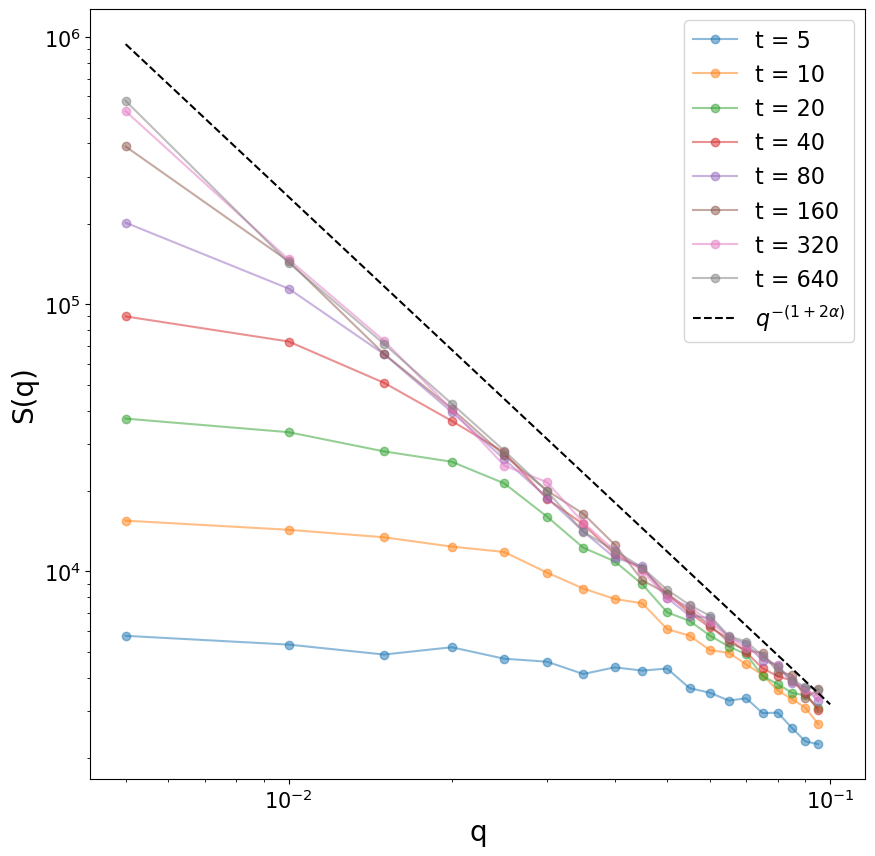

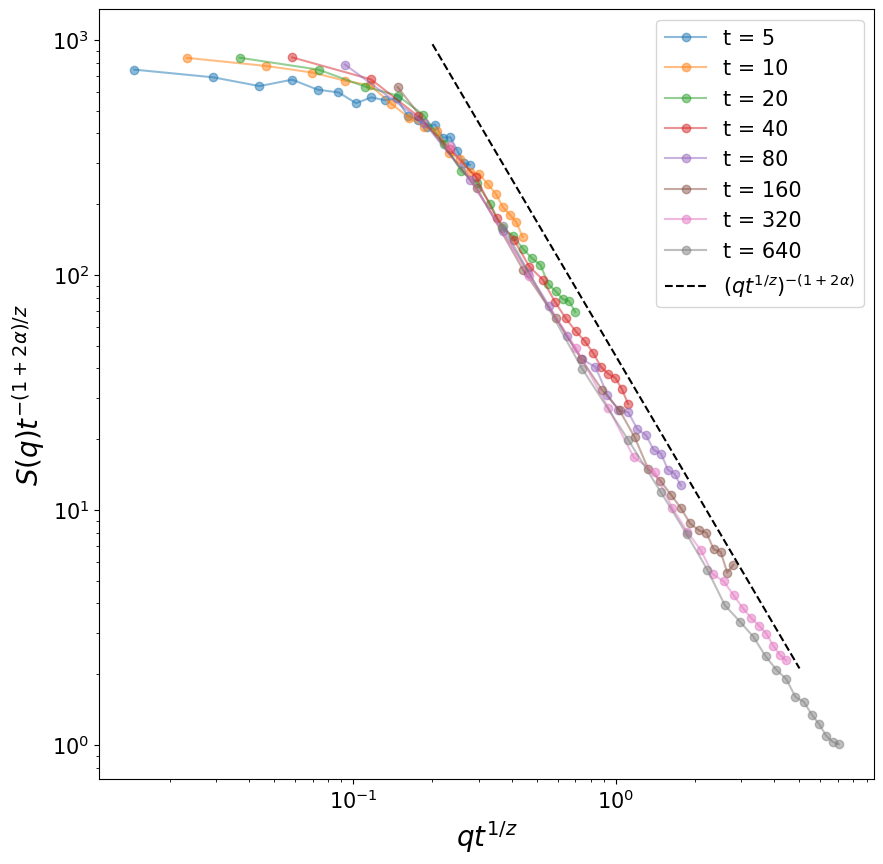

In [44]:
alpha = 0.45
z=3/2
q = np.arange(L//2+1)/L
ts = [2**i for i in range(8)]

qm = 20

plt.figure(figsize=(10,10))
for ti in ts:
    plt.plot(q[1:qm],h_fft_mean[ti,1:qm],'-o',label='t = %d' % t[ti],alpha = 0.5)
x = np.linspace(.005,.1,100)
plt.plot(x,40*x**-(1+2*alpha),'k--',label=r'$q^{-(1+2\alpha)}$')
plt.legend(fontsize=16)
plt.xlabel('q',fontsize=20)
plt.ylabel('S(q)',fontsize=20)
plt.xscale('log')
plt.yscale('log')
#plt.xlim(0.004,.1)
#plt.ylim(10**3,10**6)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


plt.savefig('/home/renzo/Tesis_M/tesis/Tesis_Tex/figs/cap1/Sq.pdf',dpi=300,bbox_inches='tight')

plt.figure(figsize=(10,10))
for ti in ts:
    plt.plot(q[1:qm]*t[ti]**(1/z),h_fft_mean[ti,1:qm]/t[ti]**((1+2*alpha)/z),'-o',label='t = %d' % t[ti],alpha = 0.5)

x = np.linspace(.2,5,100)
plt.plot(x,45*x**-(1+2*alpha),'k--',label=r'$(qt^{1/z})^{-(1+2\alpha)}$')
plt.legend(fontsize=15)
plt.xlabel(r'$qt^{1/z}$',fontsize=20)
plt.ylabel(r'$S(q)t^{-(1+2\alpha)/z}$',fontsize=20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xscale('log')
plt.yscale('log')

plt.savefig('/home/renzo/Tesis_M/tesis/Tesis_Tex/figs/cap1/Sq_colapse.pdf',dpi=300,bbox_inches='tight')


plt.show()


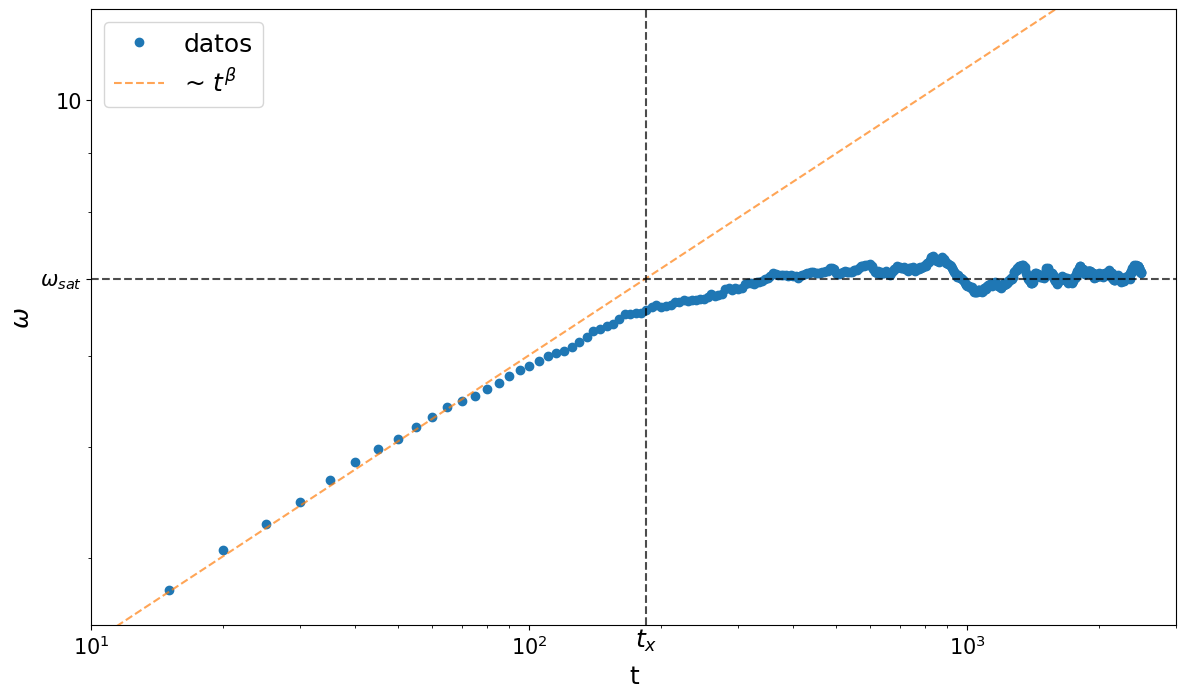

In [12]:
import matplotlib
plt.figure(figsize=(14,8))
plt.plot(t,w_mean, 'o', label='datos',ms = 6)
plt.plot(t,1.9*t**(0.25),'--', alpha = 0.7, label=r'~ $t^{\beta}$')
plt.axvline(185, color='k', linestyle='--',alpha=0.7)
plt.text(185, 3.35, '$t_x$',fontsize=18,horizontalalignment='center')
plt.axhline(7, color='k', linestyle='--',alpha=0.7)
#plt.text(7, 7, '$\omega_{sat}$',fontsize=15,verticalalignment='center')

plt.xlabel('t', fontsize=18)
plt.ylabel('$\omega$',fontsize=18)
plt.xlim(10,3*10**3)
plt.ylim(3.5,12)
plt.xscale('log')
plt.yscale('log')
#ylabels

plt.yticks([7,10],['$\omega_{sat}$','10'])
plt.gca().yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
#ticks size
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(fontsize=18)

plt.savefig('/home/renzo/Tesis_M/tesis/Tesis_Tex/figs/cap1/width.pdf', dpi=300, bbox_inches='tight')


plt.show()

In [159]:
# 1D Ballistic deposition simulation

# Parameters
N = 1000000 # number of particles
L = [100,200,400,800] # size of the grid
n_interfaces = [100,50,25,10]
h_mean = np.zeros((len(L),N//1000))
w_mean = np.zeros((len(L),N//1000))
t = np.zeros((len(L),N//1000))

for l in range(len(L)):
    # Initialize the grid
    interfaces = np.zeros((n_interfaces[l],L[l]))
    h = np.zeros(N//1000)
    w = np.zeros(N//1000)

    # Loop over particles
    for j in range(n_interfaces[l]):
        m=0
        for i in range(N):
            x = np.random.randint(L[l])
            interfaces[j,x] = np.max([interfaces[j,(x-1)%L[l]], interfaces[j,(x+1)%L[l]], interfaces[j,x]+1])
            if i % 1000 == 0:
                t[l,m] = i/L[l]
                h[m] = interfaces[j].mean()
                w[m] = interfaces[j].std()
                m += 1
        h_mean[l] += h
        w_mean[l] += w

    h_mean[l] /= n_interfaces[l]
    w_mean[l] /= n_interfaces[l]

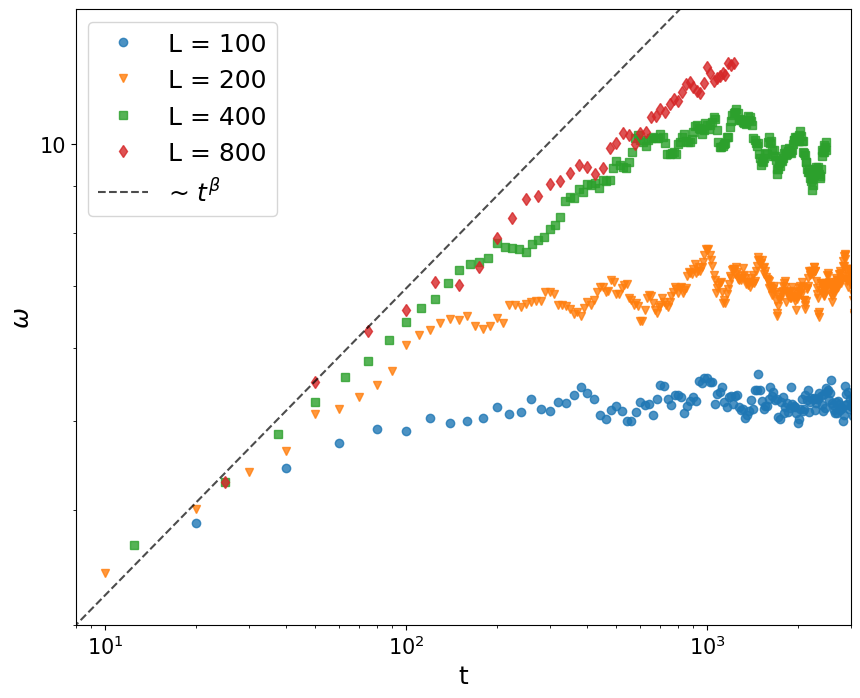

In [200]:
import matplotlib

plt.figure(figsize=(10,8))

id = [2**i for i in range(9)]
plt.plot(t[0][::2],w_mean[0][::2],'o', label='L = {}'.format(L[0]),alpha=0.8)
plt.plot(t[1][::2],w_mean[1][::2],'v', label='L = {}'.format(L[1]),alpha=0.8)
plt.plot(t[2][::5],w_mean[2][::5],'s', label='L = {}'.format(L[2]),alpha=0.8)
plt.plot(t[3][::20],w_mean[3][::20],'d', label='L = {}'.format(L[3]),alpha=0.8)

plt.plot(t[-1],1.5*t[-1]**(1/3),'--',c='k', alpha = 0.7, label=r'~ $t^{\beta}$')

#plt.axvline(125, color='k', linestyle='--',alpha=0.7)
#plt.text(125, 3.65, '$t_x$',fontsize=18,horizontalalignment='center')
#plt.axhline(7, color='k', linestyle='--',alpha=0.7)
#
plt.xlabel('t', fontsize=18)
plt.ylabel('$\omega$',fontsize=18)
plt.xlim(8,3*10**3)
plt.ylim(3,14)
plt.xscale('log')
plt.yscale('log')
#ylabels

plt.yticks([10],['10'])
plt.gca().yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(fontsize=18)

plt.savefig('/home/renzo/Tesis_M/tesis/Tesis_Tex/figs/cap1/width_L.pdf', dpi=300, bbox_inches='tight')


plt.show()

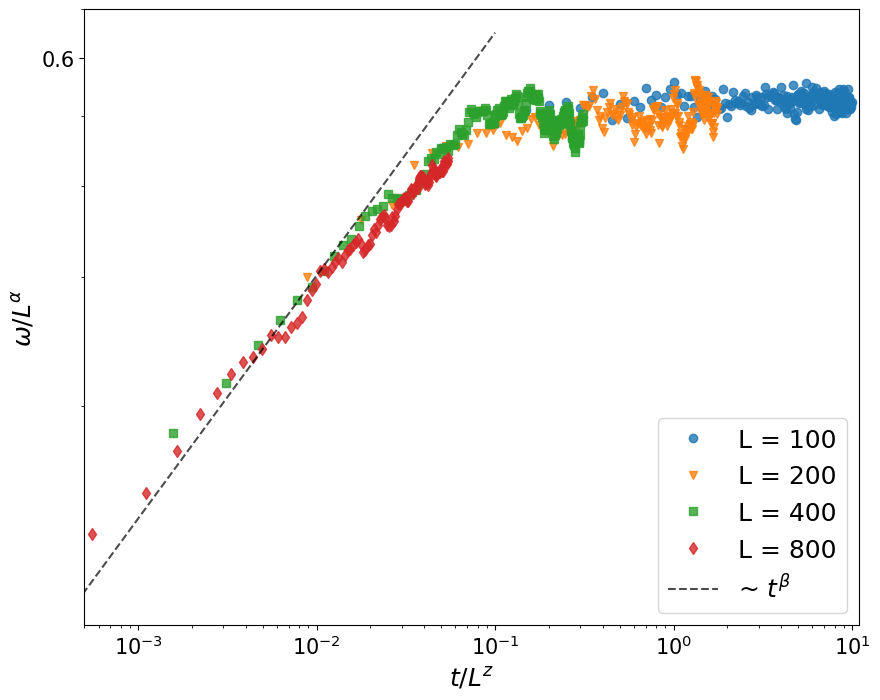

In [222]:
import matplotlib

plt.figure(figsize=(10,8))
x = np.linspace(0.0001,.1,100)
plt.plot(t[0][::5]/100**(3/2),w_mean[0][::5]/100**.5,'o', label='L = {}'.format(L[0]),alpha=0.8)
plt.plot(t[1][::5]/200**(3/2),w_mean[1][::5]/200**.5,'v', label='L = {}'.format(L[1]),alpha=0.8)
plt.plot(t[2][::5]/400**(3/2),w_mean[2][::5]/400**.5,'s', label='L = {}'.format(L[2]),alpha=0.8)
plt.plot(t[3][::10]/800**(3/2),w_mean[3][::10]/800**.5,'d', label='L = {}'.format(L[3]),alpha=0.8)

plt.plot(x,1.4*x**(1/3),'--',c='k', alpha = 0.7, label=r'~ $t^{\beta}$')

#plt.axvline(125, color='k', linestyle='--',alpha=0.7)
#plt.text(125, 3.65, '$t_x$',fontsize=18,horizontalalignment='center')
#plt.axhline(7, color='k', linestyle='--',alpha=0.7)
#
plt.xlabel('$t/L^z$', fontsize=18)
plt.ylabel(r'$\omega/L^{\alpha}$',fontsize=18)
plt.xlim(.0005,11)
plt.ylim(.1,.7)
plt.xscale('log')
plt.yscale('log')

#ylabels
plt.yticks([0.6],['0.6'])
plt.gca().yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(fontsize=18)
plt.savefig('/home/renzo/Tesis_M/tesis/Tesis_Tex/figs/cap1/width_L_colapse.pdf', dpi=300, bbox_inches='tight')


plt.show()